# 비선형 회귀

- 실제 데이터들은 선형 모형으로 적합하지 않을 가능성이 매우 매우 높다 
- 하지만, 비선형의 문제는 정확도가 높지 않다. 

## 데이터 만들기 

$$
    f(x) = x^2 + 4x + 6 
$$

$$
    f(x) = ax^2 + bx + C
$$
- 이 함수를 이용해 가상의 데이터를 가정해보자 

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def f(x): 
    return x ** 2 + 4*x + 6

In [27]:
x = np.linspace(-20,60,50)
fx = f(x)

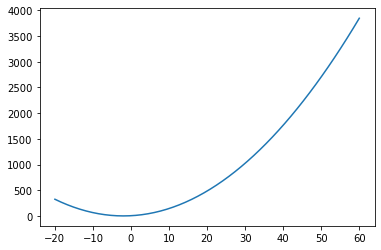

In [28]:
plt.plot(x,fx)
plt.show()

In [68]:
np.random.seed(3)
                # 랜덤하게 데이터를 뽑아냄 
y = fx + 500 * np.random.rand(len(x))

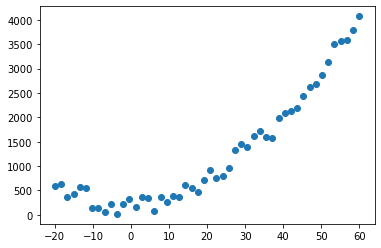

In [32]:
plt.plot(x,y, 'o')
plt.show()

## loss function 

- MSE (MEAN Squared Error)

$$
        loss(w) = \frac{1}{N} \sum_{i=1}^N | w_0x_i^2 + w_1x_i + w_2 - y_i | ^ 2 
$$

- $ w_0x_i^2 + w_1x_i + w_2 $ : 일반적인 함수
- $w$ :  모수(값을 찾아야 함)

In [52]:
from scipy.optimize import minimize

In [58]:
def loss(w):
    return np.mean((w[0]*x**2 + w[1]*x + w[2] - y) ** 2)

In [73]:
w0 = [0, 0, 0]
ret = minimize(loss, w0)

In [70]:
w = ret.x
print(w)
y_predict = w[0]*x**2 + w[1]*x + w[2] 

[  0.99112918   4.46804024 238.98567768]


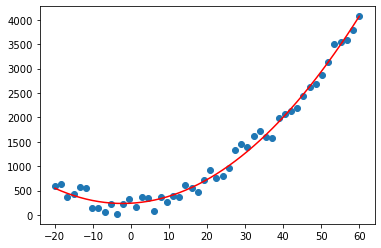

In [64]:
plt.plot(x,y, 'o')
plt.plot(x, y_predict, 'r-')
plt.show()

## 2번째 샘플 (함수값을 모르는 상태)

- 부족한 데이터
- 

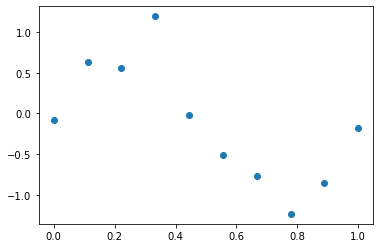

In [91]:
np.random.seed(2)

x= np.linspace(0,1,100)
t= np.sin(2*np.pi*x)

N = 10
x_train = np.linspace(0,1,N)
t_train = np.sin(2*np.pi*x_train)+(np.random.randn(N)/5)

# 관찰되지 않는 데이터에 비슷한 임의의 데이터 값을 추가하는 것
Noise = 100
x_noise = np.linspace(0,1, Noise)
t_noise = np.sin(2*np.pi*x_noise) + (np.random.randn(Noise)/5)

#plt.plot(x, t, '--')
plt.plot(x_train, t_train, 'o')
#plt.plot(x_noise, t_noise, 'o', alpha = 0.5)
plt.show()

## 선형 모델의 적용(linear regression) 
- 주어진 데이터가 선형적인 관계가 있을것으로 가정(hyposesis) 
- 주어진 데이터를 가지고 함수를 찾는 것이 어렵기 때문에 
- 일단 함수를 가정 해놓고, 모수를 찾는 문제로 변형할 수 있기 때문에 난이도가 낮아짐 


- 준비된 학습 데이터를 잘 표현하는 직 '직선'을 찾는다면 다음과 같은 함수로 가정하고 시작할 수 있다. 

$$
    y = b + ax \\
    y = \theta_0 + \theta_1 x \\
    y = w_0 + w_1 x 
$$

- 1이 생략된 형태이니 다음과 같은 표현이 가능하다. 

$$
    y = w_0 \cdot 1 + w_1x
$$

- 그래서 벡터 표현으로 변경하고 싶다면 다음과 같을 것이다. 

$$
    y = w_0 \cdot 1 + w_1 \cdot x = [w_0, w_1] \cdot \begin{bmatrix} 1 \\ x  \end{bmatrix} = w^T \cdot x 
$$

## 문제점 
- 관측된 데이터의 절대적으로 부족하다. 
- 결과적으로는 sin()함수와 같은 모델을 만드는 것이 목적이나, 
- 선형적으로나 비선형적으로 가능한지 모르는 상황이다. 
- 따라서 모수적 추정이 필요하다. 

In [96]:
def loss(w):
    return np.mean((w[0]*1+w[1]*x - t)**2)

In [97]:
w0 = [0,0]
ret = minimize(loss, w0)

In [99]:
w = ret.x 
y_predict = w[0] + w[1] * x
print(w)

[ 0.92634928 -1.85269851]


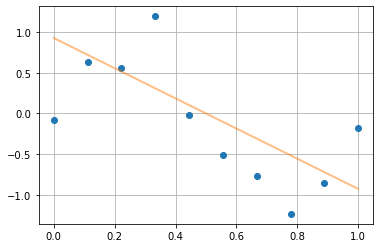

In [111]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, y_predict, alpha=0.5, lw=2)
plt.grid()
plt.show()

## 비선형 회귀(non-linear regression)

- 직선으로는 주어진 데이터를 잘 설명하지 못하기 때문에 곡선을 이용
- 다항식을 사용하는데, 이 식이 sin()처럼 비슷해지길 바라는 상황 
- 주어진 데이터가 다항식과 비슷하지 않는지 가설을 세우는 것 

- 만들 수 있는 다항식은 다음과 같다 
$$
    y(x, w) = w_0 + w_1x^1 + w_2x^2 + \cdots + w_nx^n
$$

- 어떤 형태의 다항함수를 쓸 것인가? 
- 항을 몇 개를 쓸 것이며, 차수는 얼마까지 가져가는가? ...
- 그래서 마음대로 선택해보자 일단 함수식을 모르니까 

$$
        y (x, w) = -2 + 1.5x + 0.3x^2  + 3x^3
$$

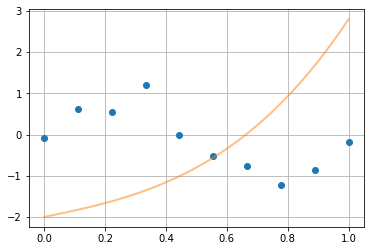

In [113]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, -2 + 1.5*x + 0.3*x**2 + 3*x**3, alpha=0.5, lw=2)
plt.grid()
plt.show()

## numpy의 라이브러리를 이용하여 문제 풀기

In [124]:
# 1차 다항식 
         #다항식                  #차수  
tmp1 = np.polyfit(x_train, t_train, 1)
tmp4 = np.polyfit(x_train, t_train, 9)

        # tmp를 가지고 만들어준 함수 
lin = np.poly1d(tmp1)
non_lin = np.poly1d(tmp4)

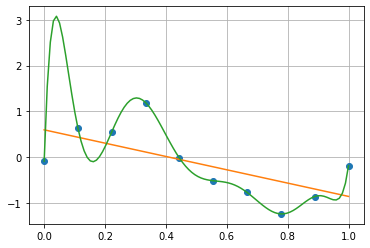

In [125]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, lin(x))
plt.plot(x, non_lin(x))
plt.grid()
plt.show()

## 수학적으로 데이터의 갯수가 n일때, n-1차식을 이용하여 주어진 데이터를 정확히 표현할 수 있는 함수의 존재는 증명이 되었다.
